<a href="https://colab.research.google.com/github/HillaAnku/HillaAnku/blob/master/US_Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/My Drive/python_for_data_scientists/US_Accidents.csv')

In [2]:
# display all the columns of the dataset

pd.options.display.max_columns = None

In [3]:
data.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201,3,2/8/2016 5:46,2/8/2016 11:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2/8/2016 5:58,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201,2,2/8/2016 6:07,2/8/2016 6:37,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2/8/2016 5:51,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201,2,2/8/2016 6:49,2/8/2016 7:19,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2/8/2016 6:56,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201,3,2/8/2016 7:23,2/8/2016 7:53,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2/8/2016 7:38,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201,2,2/8/2016 7:39,2/8/2016 8:09,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2/8/2016 7:53,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 49 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1048575 non-null  object 
 1   Source                 1048575 non-null  object 
 2   TMC                    1048575 non-null  int64  
 3   Severity               1048575 non-null  int64  
 4   Start_Time             1048575 non-null  object 
 5   End_Time               1048575 non-null  object 
 6   Start_Lat              1048575 non-null  float64
 7   Start_Lng              1048575 non-null  float64
 8   End_Lat                0 non-null        float64
 9   End_Lng                0 non-null        float64
 10  Distance(mi)           1048575 non-null  float64
 11  Description            1048574 non-null  object 
 12  Number                 393341 non-null   float64
 13  Street                 1048575 non-null  object 
 14  Side              

In [5]:
# Check the percent of missing/null values in each column

data.isnull().sum()*100/data.isnull().count()

ID                         0.000000
Source                     0.000000
TMC                        0.000000
Severity                   0.000000
Start_Time                 0.000000
End_Time                   0.000000
Start_Lat                  0.000000
Start_Lng                  0.000000
End_Lat                  100.000000
End_Lng                  100.000000
Distance(mi)               0.000000
Description                0.000095
Number                    62.488043
Street                     0.000000
Side                       0.000000
City                       0.003338
County                     0.000000
State                      0.000000
Zipcode                    0.016212
Country                    0.000000
Timezone                   0.061131
Airport_Code               0.123692
Weather_Timestamp          1.099874
Temperature(F)             1.636125
Wind_Chill(F)             44.166512
Humidity(%)                1.786520
Pressure(in)               1.327421
Visibility(mi)             1

In [6]:
# missing continous variables filled with the mean of each column

for column_name in data.columns:
    if(data[column_name].dtype =='float64' or data[column_name].dtype=='int64' ):
        data[column_name].fillna(data[column_name].mean(), inplace = True)

In [7]:
# Check the percent of missing/null values in each column

data.isnull().sum()*100/data.isnull().count()

ID                         0.000000
Source                     0.000000
TMC                        0.000000
Severity                   0.000000
Start_Time                 0.000000
End_Time                   0.000000
Start_Lat                  0.000000
Start_Lng                  0.000000
End_Lat                  100.000000
End_Lng                  100.000000
Distance(mi)               0.000000
Description                0.000095
Number                     0.000000
Street                     0.000000
Side                       0.000000
City                       0.003338
County                     0.000000
State                      0.000000
Zipcode                    0.016212
Country                    0.000000
Timezone                   0.061131
Airport_Code               0.123692
Weather_Timestamp          1.099874
Temperature(F)             0.000000
Wind_Chill(F)              0.000000
Humidity(%)                0.000000
Pressure(in)               0.000000
Visibility(mi)             0

In [8]:
# Data may contain duplicated rows, drop duplicates

print("Number of rows:", len(data.index))
data.drop_duplicates(inplace = True)
print("Number of rows after dropping duplicates:", len(data.index))

Number of rows: 1048575
Number of rows after dropping duplicates: 1048575


In [9]:
# Cast Start_Time to datetime
data["Start_Time"] = pd.to_datetime(data["Start_Time"])

# Extract year, month, weekday and day
# data["Year"] = data["Start_Time"].dt.year
# data["Month"] = data["Start_Time"].dt.month
# data["Weekday"] = data["Start_Time"].dt.weekday
# data["Day"] = data["Start_Time"].dt.day

# Extract hour and minute
data["Hour"] = data["Start_Time"].dt.hour
data["Minute"] = data["Start_Time"].dt.minute

data.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour,Minute
0,A-1,MapQuest,201,3,2016-02-08 05:46:00,2/8/2016 11:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,5108.729174,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2/8/2016 5:58,36.9,55.756308,91.0,29.68,10.0,Calm,7.916677,0.020000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,5,46
1,A-2,MapQuest,201,2,2016-02-08 06:07:00,2/8/2016 6:37,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.000000,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2/8/2016 5:51,37.9,55.756308,100.0,29.65,10.0,Calm,7.916677,0.000000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,6,7
2,A-3,MapQuest,201,2,2016-02-08 06:49:00,2/8/2016 7:19,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,5108.729174,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2/8/2016 6:56,36.0,33.300000,100.0,29.67,10.0,SW,3.500000,0.013389,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,6,49
3,A-4,MapQuest,201,3,2016-02-08 07:23:00,2/8/2016 7:53,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,5108.729174,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2/8/2016 7:38,35.1,31.000000,96.0,29.64,9.0,SW,4.600000,0.013389,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,7,23
4,A-5,MapQuest,201,2,2016-02-08 07:39:00,2/8/2016 8:09,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,5108.729174,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2/8/2016 7:53,36.0,33.300000,89.0,29.65,6.0,SW,3.500000,0.013389,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,7,39


In [10]:
# Change hours to minutes and add both the Hours and Minutes to create a new time column called Duration
# Duration measures the time in minutes that an accident situation lasted

data['Duration'] = data['Hour']*60 + data['Minute']

In [11]:
data.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour,Minute,Duration
0,A-1,MapQuest,201,3,2016-02-08 05:46:00,2/8/2016 11:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,5108.729174,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2/8/2016 5:58,36.9,55.756308,91.0,29.68,10.0,Calm,7.916677,0.020000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,5,46,346
1,A-2,MapQuest,201,2,2016-02-08 06:07:00,2/8/2016 6:37,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.000000,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2/8/2016 5:51,37.9,55.756308,100.0,29.65,10.0,Calm,7.916677,0.000000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,6,7,367
2,A-3,MapQuest,201,2,2016-02-08 06:49:00,2/8/2016 7:19,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,5108.729174,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2/8/2016 6:56,36.0,33.300000,100.0,29.67,10.0,SW,3.500000,0.013389,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,6,49,409
3,A-4,MapQuest,201,3,2016-02-08 07:23:00,2/8/2016 7:53,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,5108.729174,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2/8/2016 7:38,35.1,31.000000,96.0,29.64,9.0,SW,4.600000,0.013389,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,7,23,443
4,A-5,MapQuest,201,2,2016-02-08 07:39:00,2/8/2016 8:09,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,5108.729174,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2/8/2016 7:53,36.0,33.300000,89.0,29.65,6.0,SW,3.500000,0.013389,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,7,39,459


In [12]:
# Drop variables that are either statistically irrelevant to the task or simply redundant

features_to_drop = ["ID", "Source", "TMC", "End_Lat", "End_Lng", "Start_Lat", "Start_Lng", "Number", "Street",
                    "Timezone", "Airport_Code", "Civil_Twilight", "Nautical_Twilight", "Astronomical_Twilight",
                   "Start_Time", "End_Time", "Hour", "Minute", "Wind_Chill(F)", "Weather_Timestamp"]
data = data.drop(features_to_drop, axis = 1)

In [13]:
cont_vars = []
for column_name in data.columns:
    if data[column_name].dtype == 'int64' or data[column_name].dtype == 'float64':
        cont_vars.append(column_name)

In [14]:
cat_vars = []
for column_name in data.columns:
    if data[column_name].dtype == 'object':
        cat_vars.append(column_name)

In [15]:
data.head()

,Severity,Distance(mi),Description,Side,City,County,State,Zipcode,Country,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Duration
0,3,0.01,Right lane blocked due to accident on I-70 Eas...,R,Dayton,Montgomery,OH,45424,US,36.9,91.0,29.68,10.0,Calm,7.916677,0.020000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,346
1,2,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,L,Reynoldsburg,Franklin,OH,43068-3402,US,37.9,100.0,29.65,10.0,Calm,7.916677,0.000000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,367
2,2,0.01,Accident on OH-32 State Route 32 Westbound at ...,R,Williamsburg,Clermont,OH,45176,US,36.0,100.0,29.67,10.0,SW,3.500000,0.013389,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,409
3,3,0.01,Accident on I-75 Southbound at Exits 52 52B US...,R,Dayton,Montgomery,OH,45417,US,35.1,96.0,29.64,9.0,SW,4.600000,0.013389,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,443
4,2,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,R,Dayton,Montgomery,OH,45459,US,36.0,89.0,29.65,6.0,SW,3.500000,0.013389,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,459


In [16]:
# Checking for outliers

for column_name in data.columns:
    if(data[column_name].dtype =='float64' or data[column_name].dtype=='int64' ):
        q75, q25 = np.percentile(data[column_name], [75 ,25])
        iqr = q75 - q25

        for threshold in np.arange(1,5):
            min_val = q25 - (iqr*threshold)
            max_val = q75 + (iqr*threshold)
            print('\n' + column_name)
            print("The score threshold is: {}".format(threshold))
            print("Number of outliers is: {}".format(
            len((np.where((data[column_name] > max_val) 
                      | (data[column_name] < min_val))[0]))
    ))


Severity
The score threshold is: 1
Number of outliers is: 0

Severity
The score threshold is: 2
Number of outliers is: 0

Severity
The score threshold is: 3
Number of outliers is: 0

Severity
The score threshold is: 4
Number of outliers is: 0

Distance(mi)
The score threshold is: 1
Number of outliers is: 56669

Distance(mi)
The score threshold is: 2
Number of outliers is: 56621

Distance(mi)
The score threshold is: 3
Number of outliers is: 56550

Distance(mi)
The score threshold is: 4
Number of outliers is: 56522

Temperature(F)
The score threshold is: 1
Number of outliers is: 31735

Temperature(F)
The score threshold is: 2
Number of outliers is: 760

Temperature(F)
The score threshold is: 3
Number of outliers is: 18

Temperature(F)
The score threshold is: 4
Number of outliers is: 14

Humidity(%)
The score threshold is: 1
Number of outliers is: 15170

Humidity(%)
The score threshold is: 2
Number of outliers is: 0

Humidity(%)
The score threshold is: 3
Number of outliers is: 0

Humidit

In [17]:
# Limit the effect of outliers by winsorization

from scipy.stats.mstats import winsorize

for column_name in data.columns:
    if data[column_name].dtype == 'int64' or data[column_name].dtype == 'float64':
        data[column_name] = winsorize(data[column_name], (0, 0.10))

In [18]:
# Checking for outliers

for column_name in data.columns:
    if(data[column_name].dtype =='float64' or data[column_name].dtype=='int64' ):
        q75, q25 = np.percentile(data[column_name], [75 ,25])
        iqr = q75 - q25

        for threshold in np.arange(1,5):
            min_val = q25 - (iqr*threshold)
            max_val = q75 + (iqr*threshold)
            print('\n' + column_name)
            print("The score threshold is: {}".format(threshold))
            print("Number of outliers is: {}".format(
            len((np.where((data[column_name] > max_val) 
                      | (data[column_name] < min_val))[0]))
    ))


Severity
The score threshold is: 1
Number of outliers is: 0

Severity
The score threshold is: 2
Number of outliers is: 0

Severity
The score threshold is: 3
Number of outliers is: 0

Severity
The score threshold is: 4
Number of outliers is: 0

Distance(mi)
The score threshold is: 1
Number of outliers is: 0

Distance(mi)
The score threshold is: 2
Number of outliers is: 0

Distance(mi)
The score threshold is: 3
Number of outliers is: 0

Distance(mi)
The score threshold is: 4
Number of outliers is: 0

Temperature(F)
The score threshold is: 1
Number of outliers is: 29098

Temperature(F)
The score threshold is: 2
Number of outliers is: 746

Temperature(F)
The score threshold is: 3
Number of outliers is: 12

Temperature(F)
The score threshold is: 4
Number of outliers is: 12

Humidity(%)
The score threshold is: 1
Number of outliers is: 15170

Humidity(%)
The score threshold is: 2
Number of outliers is: 0

Humidity(%)
The score threshold is: 3
Number of outliers is: 0

Humidity(%)
The score t

In [19]:
import plotly.graph_objects as go

state_counts = data["State"].value_counts()
fig = go.Figure(data = go.Choropleth(locations = state_counts.index, z = state_counts.values.astype(float),
                                     locationmode = "USA-states", colorscale = "pinkyl"))
fig.update_layout(title_text = "Number of US Accidents for each State", geo_scope = "usa")
fig.show()

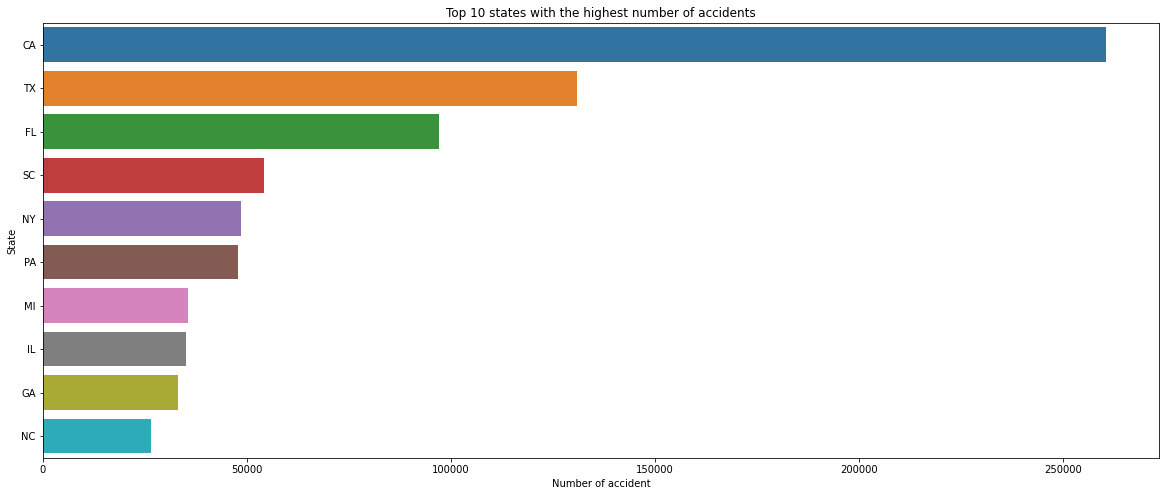

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20, 8))
plt.title("Top 10 states with the highest number of accidents")
sns.barplot(state_counts[:10].values, state_counts[:10].index, orient = "h")
plt.xlabel("Number of accident")
plt.ylabel("State")
plt.show()

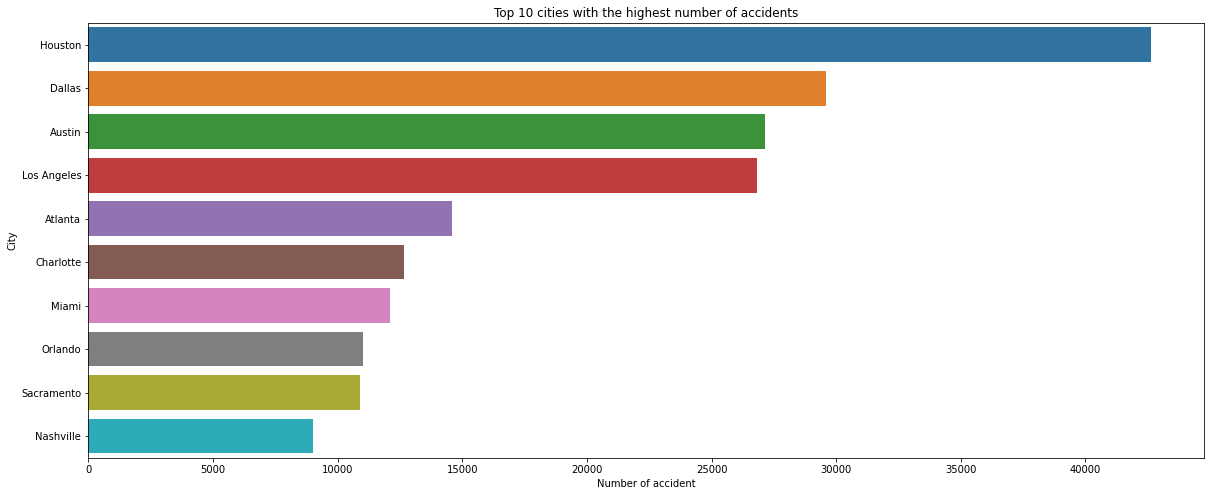

In [21]:
plt.figure(figsize = (20, 8))
city_counts = data["City"].value_counts()
plt.title("Top 10 cities with the highest number of accidents")
sns.barplot(city_counts[:10].values, city_counts[:10].index, orient = "h")
plt.xlabel("Number of accident")
plt.ylabel("City")
plt.show()

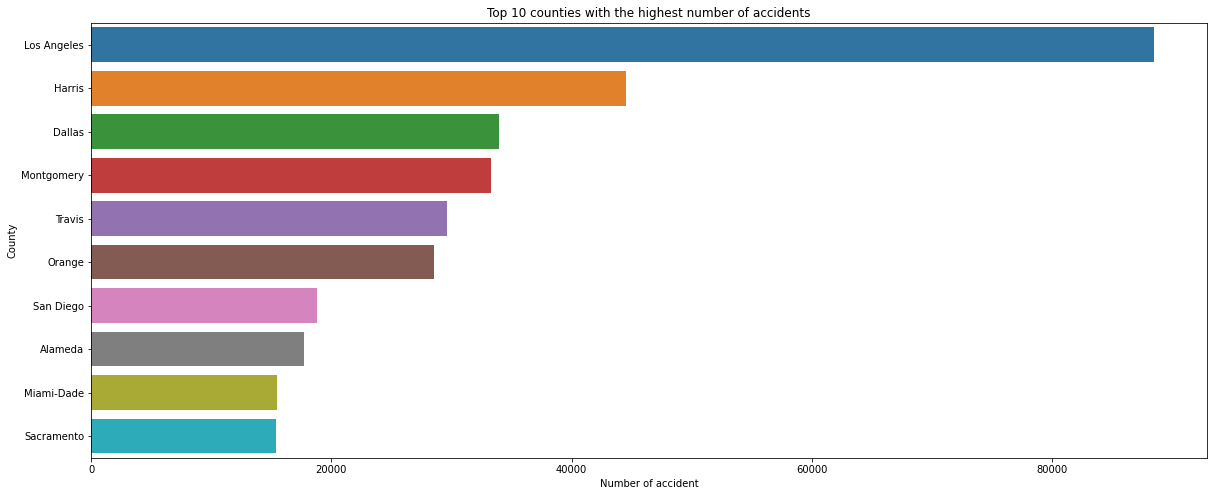

In [22]:
plt.figure(figsize = (20, 8))
county_counts = data["County"].value_counts()
plt.title("Top 10 counties with the highest number of accidents")
sns.barplot(county_counts[:10].values, county_counts[:10].index, orient = "h")
plt.xlabel("Number of accident")
plt.ylabel("County")
plt.show()

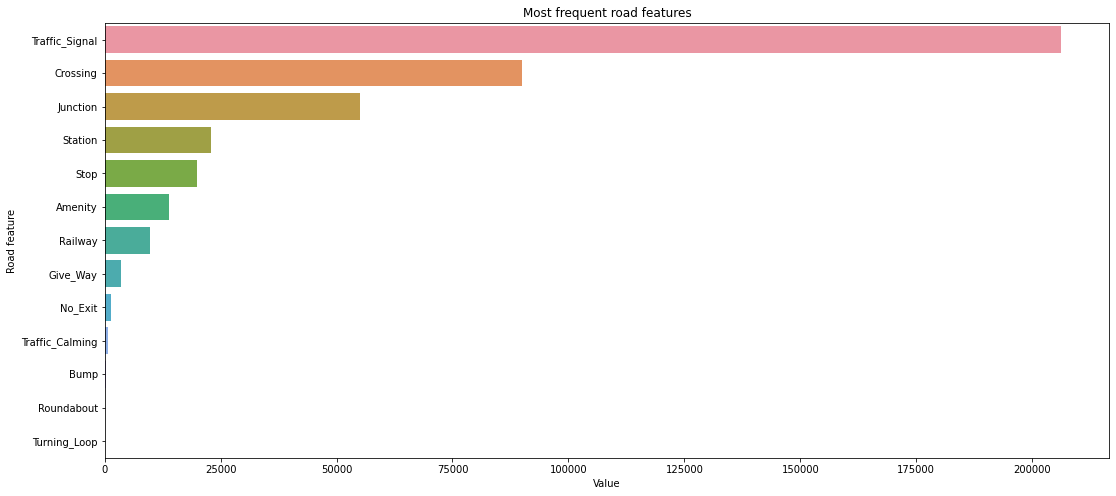

In [23]:
# Most frequent road features

road_features = ["Amenity", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal", "Turning_Loop"]
data1 = data[road_features].sum().sort_values(ascending = False)

plt.figure(figsize = (18, 8))
plt.title("Most frequent road features")
sns.barplot(data1.values, data1.index, orient = "h")
plt.xlabel("Value")
plt.ylabel("Road feature")
plt.show()

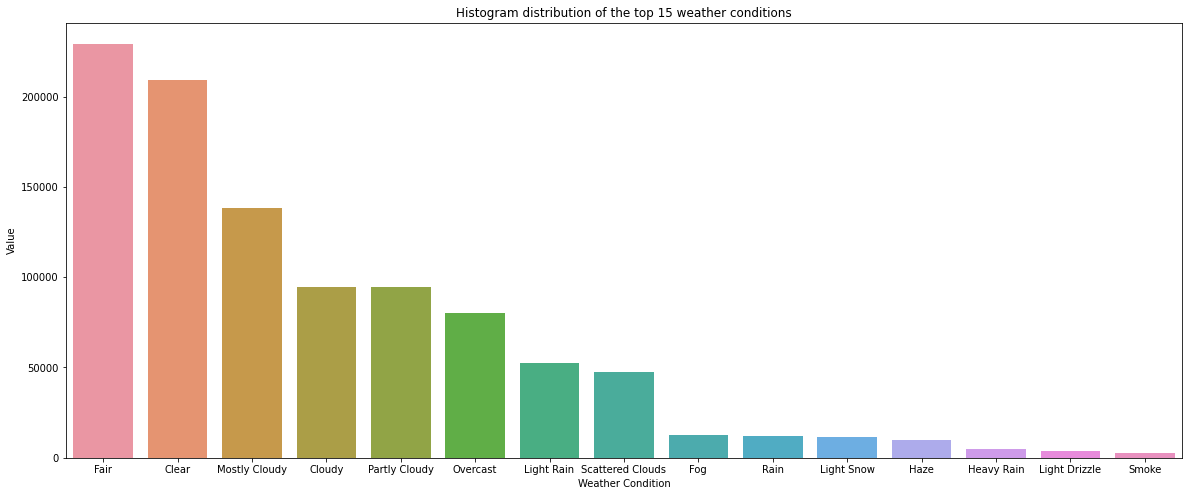

In [24]:
# Weather Condition

counts = data["Weather_Condition"].value_counts()[:15]
plt.figure(figsize = (20, 8))
plt.title("Histogram distribution of the top 15 weather conditions")
sns.barplot(counts.index, counts.values)
plt.xlabel("Weather Condition")
plt.ylabel("Value")
plt.show()

In [25]:
# If we analyze the weather conditions, we can see that there are lots of them, so it's better to 
# reduce the number of unique conditions.Replace them with more generic descriptions.

unique_weather = data["Weather_Condition"].unique()

print(len(unique_weather))
print(unique_weather)

107
['Light Rain' 'Overcast' 'Mostly Cloudy' 'Rain' 'Light Snow' 'Haze'
 'Scattered Clouds' 'Partly Cloudy' 'Clear' 'Snow'
 'Light Freezing Drizzle' 'Light Drizzle' 'Fog' 'Shallow Fog' 'Heavy Rain'
 'Light Freezing Rain' 'Cloudy' 'Drizzle' nan 'Light Rain Showers' 'Mist'
 'Smoke' 'Patches of Fog' 'Light Freezing Fog' 'Light Haze'
 'Light Thunderstorms and Rain' 'Thunderstorms and Rain' 'Fair'
 'Volcanic Ash' 'Blowing Sand' 'Blowing Dust / Windy' 'Widespread Dust'
 'Fair / Windy' 'Rain Showers' 'Mostly Cloudy / Windy'
 'Light Rain / Windy' 'Hail' 'Heavy Drizzle' 'Showers in the Vicinity'
 'Thunderstorm' 'Light Rain Shower' 'Light Rain with Thunder'
 'Partly Cloudy / Windy' 'Thunder in the Vicinity' 'T-Storm'
 'Heavy Thunderstorms and Rain' 'Thunder' 'Heavy T-Storm' 'Funnel Cloud'
 'Heavy T-Storm / Windy' 'Blowing Snow' 'Light Thunderstorms and Snow'
 'Heavy Snow' 'Low Drifting Snow' 'Light Ice Pellets' 'Ice Pellets'
 'Squalls' 'N/A Precipitation' 'Cloudy / Windy' 'Light Fog' 'Sand'
 'Sn

In [26]:
data.loc[data["Weather_Condition"].str.contains("Thunder|T-Storm", na = False), "Weather_Condition"] = "Thunderstorm"
data.loc[data["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na = False), "Weather_Condition"] = "Snow"
data.loc[data["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na = False), "Weather_Condition"] = "Rain"
data.loc[data["Weather_Condition"].str.contains("Wind|Squalls", na = False), "Weather_Condition"] = "Windy"
data.loc[data["Weather_Condition"].str.contains("Hail|Pellets", na = False), "Weather_Condition"] = "Hail"
data.loc[data["Weather_Condition"].str.contains("Fair", na = False), "Weather_Condition"] = "Clear"
data.loc[data["Weather_Condition"].str.contains("Cloud|Overcast", na = False), "Weather_Condition"] = "Cloudy"
data.loc[data["Weather_Condition"].str.contains("Mist|Haze|Fog", na = False), "Weather_Condition"] = "Fog"
data.loc[data["Weather_Condition"].str.contains("Sand|Dust", na = False), "Weather_Condition"] = "Sand"
data.loc[data["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na = False), "Weather_Condition"] = "Smoke"
data.loc[data["Weather_Condition"].str.contains("N/A Precipitation", na = False), "Weather_Condition"] = np.nan

print(data["Weather_Condition"].unique())

['Rain' 'Cloudy' 'Snow' 'Fog' 'Clear' nan 'Smoke' 'Thunderstorm' 'Sand'
 'Windy' 'Hail']


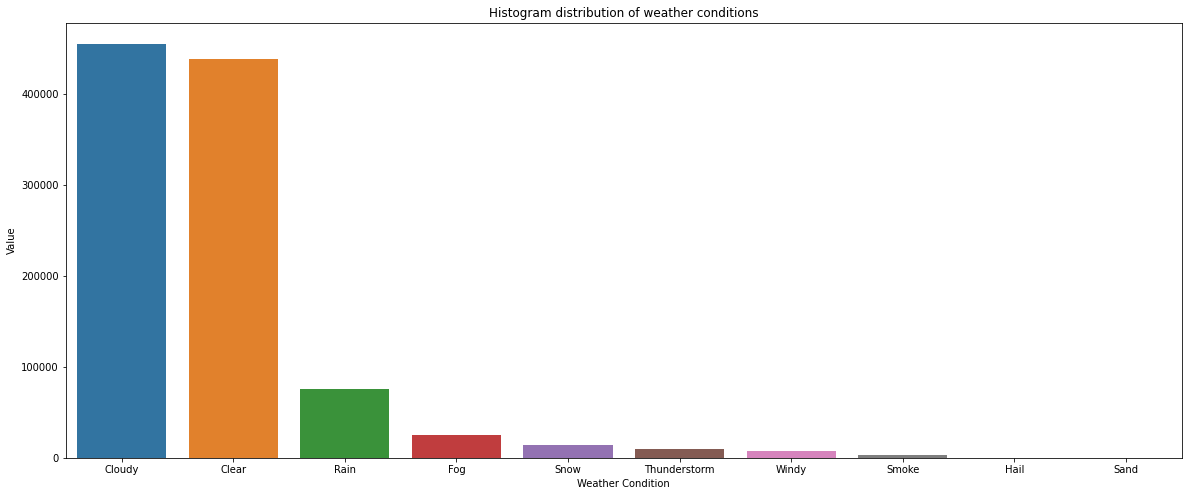

In [27]:
# Weather Condition

counts = data["Weather_Condition"].value_counts()
plt.figure(figsize = (20, 8))
plt.title("Histogram distribution of weather conditions")
sns.barplot(counts.index, counts.values)
plt.xlabel("Weather Condition")
plt.ylabel("Value")
plt.show()

In [28]:
# Doing same thing for Wind Direction

data.loc[data["Wind_Direction"] == "CALM", "Wind_Direction"] = "Calm"
data.loc[data["Wind_Direction"] == "VAR", "Wind_Direction"] = "Variable"
data.loc[data["Wind_Direction"] == "East", "Wind_Direction"] = "E"
data.loc[data["Wind_Direction"] == "North", "Wind_Direction"] = "N"
data.loc[data["Wind_Direction"] == "South", "Wind_Direction"] = "S"
data.loc[data["Wind_Direction"] == "West", "Wind_Direction"] = "W"

data["Wind_Direction"] = data["Wind_Direction"].map(lambda x : x if len(x) != 3 else x[1:], na_action="ignore")

data["Wind_Direction"].unique()

array(['Calm', 'SW', 'NW', 'W', 'NE', 'S', 'N', 'Variable', 'SE', 'E',
       nan], dtype=object)

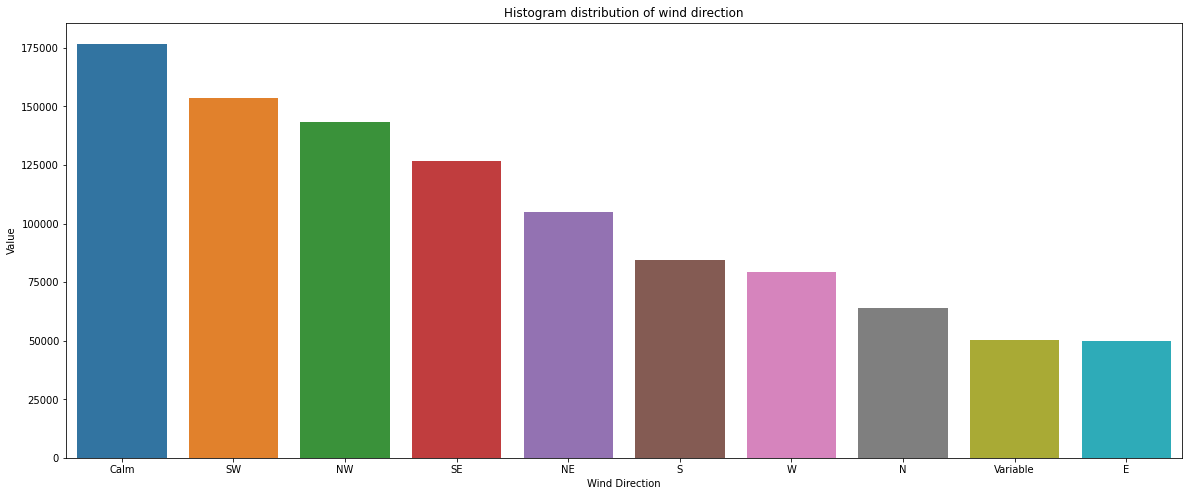

In [29]:
# Weather Condition

counts = data["Wind_Direction"].value_counts()
plt.figure(figsize = (20, 8))
plt.title("Histogram distribution of wind direction")
sns.barplot(counts.index, counts.values)
plt.xlabel("Wind Direction")
plt.ylabel("Value")
plt.show()

In [30]:
# Get severity class counts

data['Severity'].value_counts()

2    692539
3    355446
1       590
Name: Severity, dtype: int64

In [31]:
# Because of class imbalance, since there's not much difference betweence class 1 and class 2, we combine class 1 and
# class 2 into a single class.

data.loc[data["Severity"] == 1, "Severity"] = 2

In [32]:
# Get severity class counts

data['Severity'].value_counts()

2    693129
3    355446
Name: Severity, dtype: int64

In [33]:
data.loc[data["Severity"] == 2, "Severity"] = 1
data.loc[data["Severity"] == 3, "Severity"] = 2

In [34]:
# Get severity class counts

data['Severity'].value_counts()

1    693129
2    355446
Name: Severity, dtype: int64

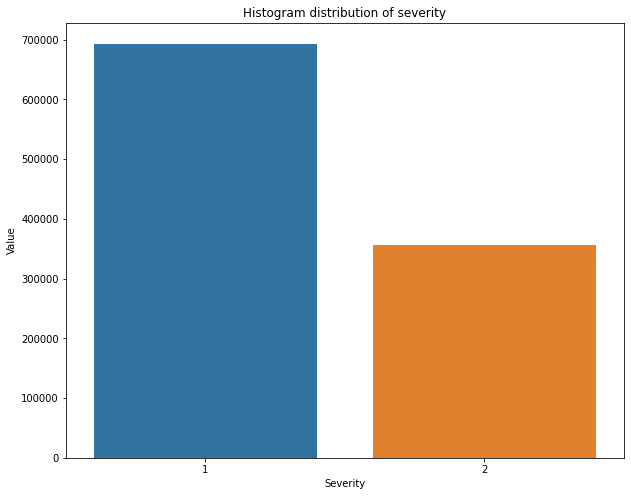

In [35]:
# Exploring severity

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

severity_counts = data["Severity"].value_counts()

plt.figure(figsize=(10, 8))
plt.title("Histogram distribution of severity")
sns.barplot(severity_counts.index, severity_counts.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

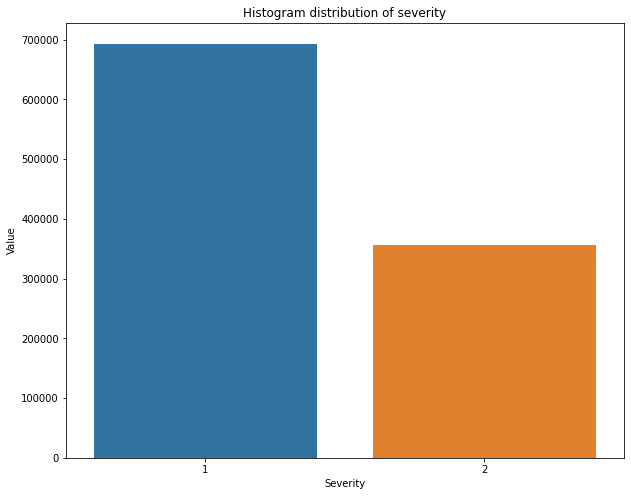

In [36]:
# Exploring severity

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

severity_counts = data["Severity"].value_counts()

plt.figure(figsize=(10, 8))
plt.title("Histogram distribution of severity")
sns.barplot(severity_counts.index, severity_counts.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

In [37]:
cat_vars

['Description',
 'Side',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Wind_Direction',
 'Weather_Condition',
 'Sunrise_Sunset']

In [38]:
data.drop('Zipcode', axis = 1)

,Severity,Distance(mi),Description,Side,City,County,State,Country,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Duration
0,2,0.01,Right lane blocked due to accident on I-70 Eas...,R,Dayton,Montgomery,OH,US,36.9,91.0,29.68,10.0,Calm,7.916677,0.013389,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,346
1,1,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,L,Reynoldsburg,Franklin,OH,US,37.9,93.0,29.65,10.0,Calm,7.916677,0.000000,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,367
2,1,0.01,Accident on OH-32 State Route 32 Westbound at ...,R,Williamsburg,Clermont,OH,US,36.0,93.0,29.67,10.0,SW,3.500000,0.013389,Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,409
3,2,0.01,Accident on I-75 Southbound at Exits 52 52B US...,R,Dayton,Montgomery,OH,US,35.1,93.0,29.64,9.0,SW,4.600000,0.013389,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,443
4,1,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,R,Dayton,Montgomery,OH,US,36.0,89.0,29.65,6.0,SW,3.500000,0.013389,Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1,0.00,Accident on Park Ave at Faraday St.,R,Rochester,Monroe,NY,US,63.0,50.0,29.67,10.0,NE,12.000000,0.000000,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,935
1048571,1,0.00,Accident on NY-590 Northbound at CR-89 Norton St.,R,Rochester,Monroe,NY,US,63.0,50.0,29.67,10.0,NE,12.000000,0.000000,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,934
1048572,2,0.00,Accident on NY-590 Northbound at Exit 9 Bayvie...,R,Rochester,Monroe,NY,US,63.0,50.0,29.67,10.0,NE,12.000000,0.000000,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,937
1048573,1,0.00,Accident on Dalston Rd at NY-18 Dewey Ave.,L,Rochester,Monroe,NY,US,63.0,50.0,29.67,10.0,NE,12.000000,0.000000,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,953


In [39]:
model_data = pd.DataFrame()
for i in range(1,3):
    S = data[data["Severity"] == i]
    model_data = model_data.append(S.sample(20000, random_state = 42))

In [40]:
model_data["Severity"].value_counts()

2    20000
1    20000
Name: Severity, dtype: int64

In [41]:
# Encode boolean values to a numerical form.

model_data = model_data.replace([True, False], [1, 0])

In [42]:
# To improve the performance of our models, we normalized the values of the continuous features

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features = ['Distance(mi)','Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)',
            'Precipitation(in)','Duration']
model_data[features] = scaler.fit_transform(model_data[features])

In [43]:
model_data.head()

,Severity,Distance(mi),Description,Side,City,County,State,Zipcode,Country,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Duration
812245,1,1.0,Accident on MA-213 Westbound between MA-113 Pl...,R,Methuen,Essex,MA,1844,US,0.819149,0.644444,1.000000,1.0,Variable,0.214286,0.0,Clear,0,0,0,0,1,0,0,0,0,0,0,0,0,Day,0.433817
670729,1,0.0,Accident on Sierra Dr at Del Monte Way.,R,Kelseyville,Lake,CA,95451-9543,US,0.861702,0.222222,0.914915,1.0,Calm,0.000000,0.0,Clear,0,0,0,0,0,0,0,0,0,0,0,0,0,Night,0.934244
562152,1,0.0,Right lane blocked due to accident on US-60 Ea...,L,Tempe,Maricopa,AZ,85282-5960,US,0.734043,0.433333,0.866867,1.0,Calm,0.000000,0.0,Clear,0,0,0,0,0,0,0,0,0,0,0,0,0,Night,0.200683
486721,1,0.0,Accident on Rundberg Ln at Creek Dr.,L,Austin,Travis,TX,78753-4719,US,1.000000,0.388889,0.963964,1.0,S,0.578571,1.0,Cloudy,1,0,0,0,0,0,0,0,0,0,0,1,0,Day,0.978651
748893,1,0.0,Accident on CR-439 Conroy Windermere Rd at Lin...,R,Orlando,Orange,FL,32835,US,0.957447,0.866667,0.965966,1.0,SW,0.428571,0.0,Clear,0,0,1,0,0,0,0,0,0,0,0,1,0,Day,0.424424


In [44]:
# Remove city because it will be encoded later

onehot_cols = cat_vars

model_data = pd.get_dummies(model_data, columns = onehot_cols, drop_first = True)

In [45]:
# Declare features and target

X = model_data.drop('Severity', axis = 1)
Y = model_data['Severity']

In [46]:
# Split up the data into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1234)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import CategoricalNB, BernoulliNB, MultinomialNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize

In [ ]:
# Train first model using logistic regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
cv_scores = cross_val_score(lr, X_train, y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validatiion score: {:.3f}'.format(np.mean(cv_scores)))

In [ ]:
# lr = LogisticRegression(random_state=42, n_jobs=-1)
# params = {"solver": ["newton-cg", "sag", "saga"]}
# grid = GridSearchCV(lr, params, n_jobs=-1, verbose=5)
# grid.fit(X_train, y_train)

# print("Best parameters scores:")
# print(grid.best_params_)
# print("Train score:", grid.score(X_train, y_train))
# print("Validation score:", grid.score(X_validate, y_validate))